# Seaborn을 사용한 데이터 분포 시각화

http://seaborn.pydata.org/

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# font_list[:]
font_path = '/Library/Fonts/NanumGothicBold.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [19]:
iris = sns.load_dataset('iris')    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

## 1차원 분포 플롯

### 1차원 실수 분포 플롯

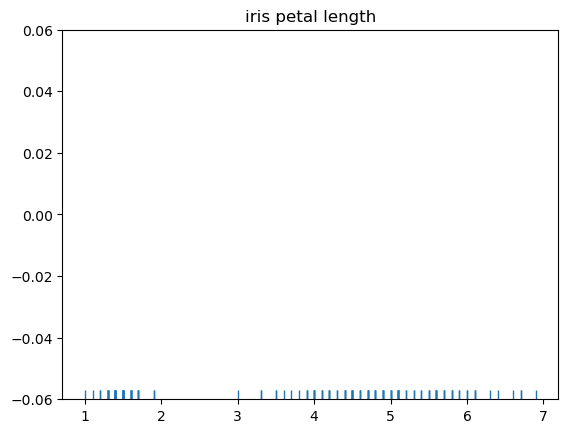

In [15]:
x = iris.petal_length.values

sns.rugplot(x) # rug = 작은 선분, x축에 작은 선분으로 데이터 위치를 나타냄
plt.title('iris petal length')
plt.show()

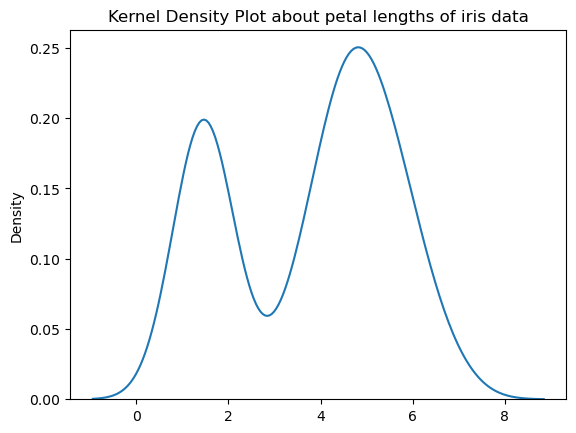

In [16]:
sns.kdeplot(x) # kernel density - 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선
plt.title('Kernel Density Plot about petal lengths of iris data')
plt.show()

/Users/heetaecho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/heetaecho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


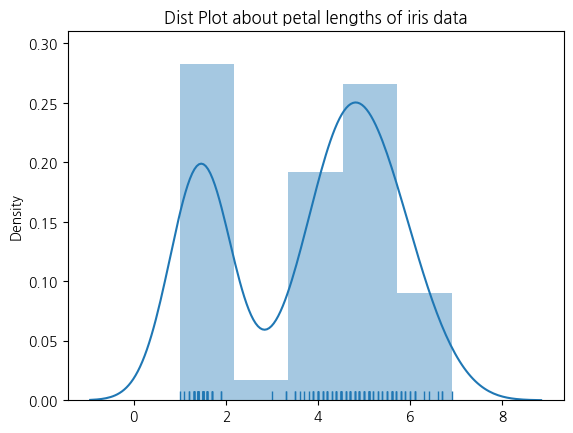

In [33]:
sns.distplot(x, kde=True, rug=True) # distplot에는 러그와 커널 밀도 표시 기능도 있어서 matplotlib의 hist보다 많이 사용됨.
plt.title('Dist Plot about petal lengths of iris data')
plt.show()

### 카운트 플롯

countplot : 각 카테고리 값 별로 데이터가 얼마나 있는지 표시  
 http://seaborn.pydata.org/generated/seaborn.countplot.html  
countplot(x='column_name', data=dataframe)

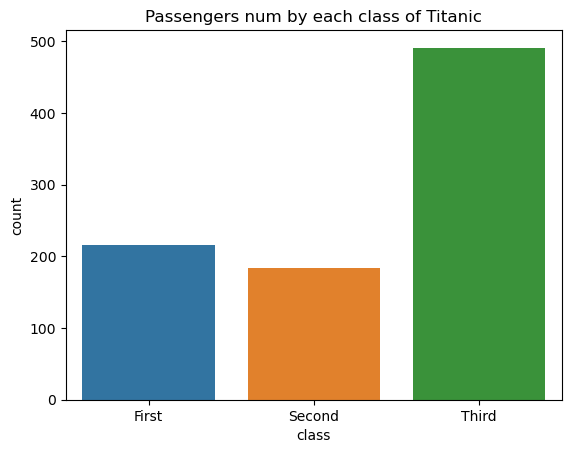

In [23]:
sns.countplot(x='class', data=titanic)
plt.title('Passengers num by each class of Titanic')
plt.show()

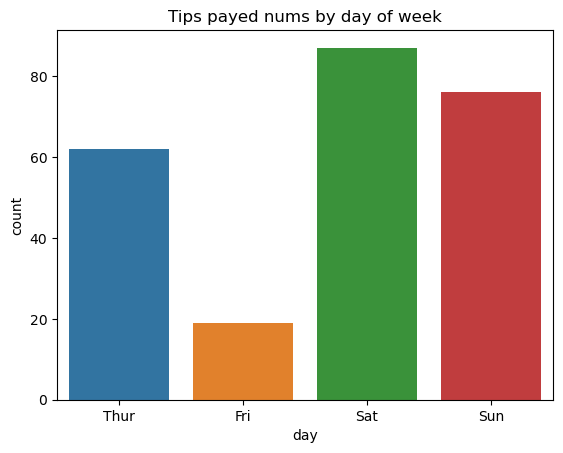

In [24]:
sns.countplot(x='day', data=tips)
plt.title('Tips payed nums by day of week')
plt.show()

## 다차원 데이터

### 2차원 실수형 데이터

jointplot : 스캐터플롯 뿐 아니라 차트 가장자리(margin)에 각 변수의 히스토그램도 그림  
http://seaborn.pydata.org/generated/seaborn.jointplot.html  
jointplot(x='x_name', y='y_name', data=dataframe, kind='scatter')  

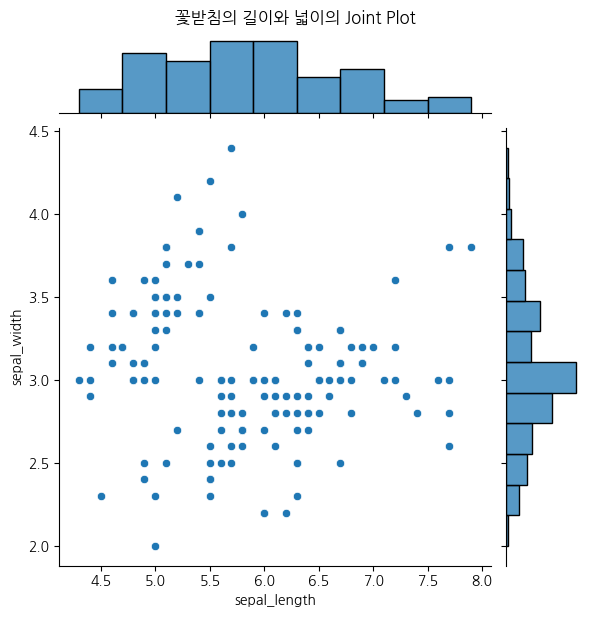

In [37]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind='scatter')
plt.suptitle('꽃받침의 길이와 넓이의 Joint Plot', y=1.02)
plt.show()

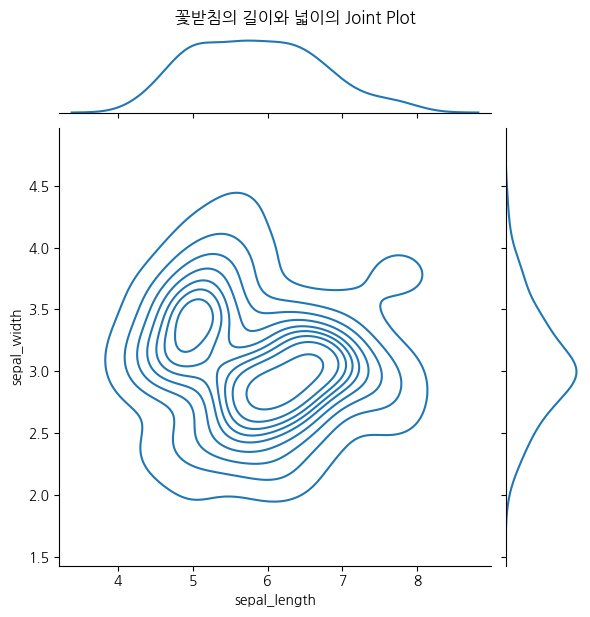

In [38]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind='kde')
plt.suptitle('꽃받침의 길이와 넓이의 Joint Plot', y=1.02)
plt.show()

### 다차원 실수형 데이터

pairplot : 3차원 이상의 데이터일 때 사용, 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터플롯을 그림. 대각선 영역에는 해당 데이터의 히스토그램  
http://seaborn.pydata.org/generated/seaborn.pairplot.html  

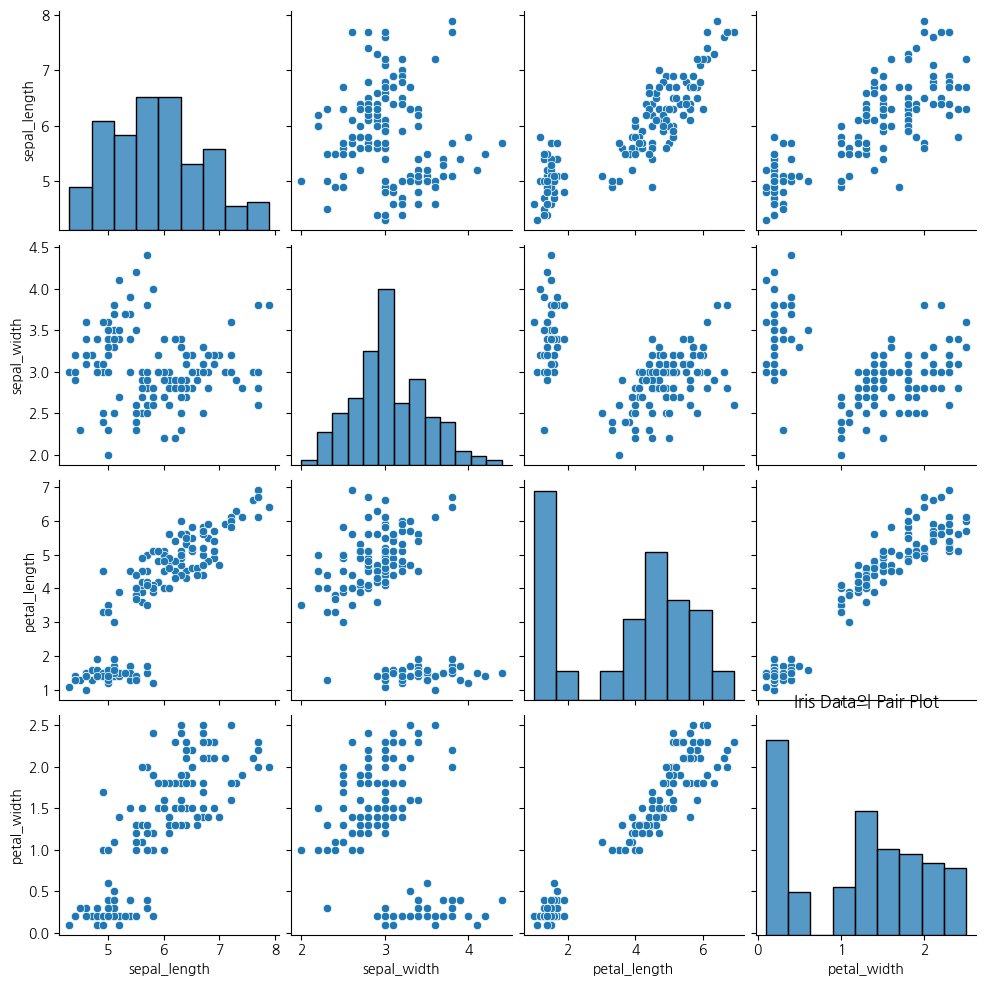

In [39]:
sns.pairplot(iris)
plt.title('Iris Data의 Pair Plot')
plt.show()

카테고리형 데이터가 섞여있는 경우 hue 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게 할 수도 있음.

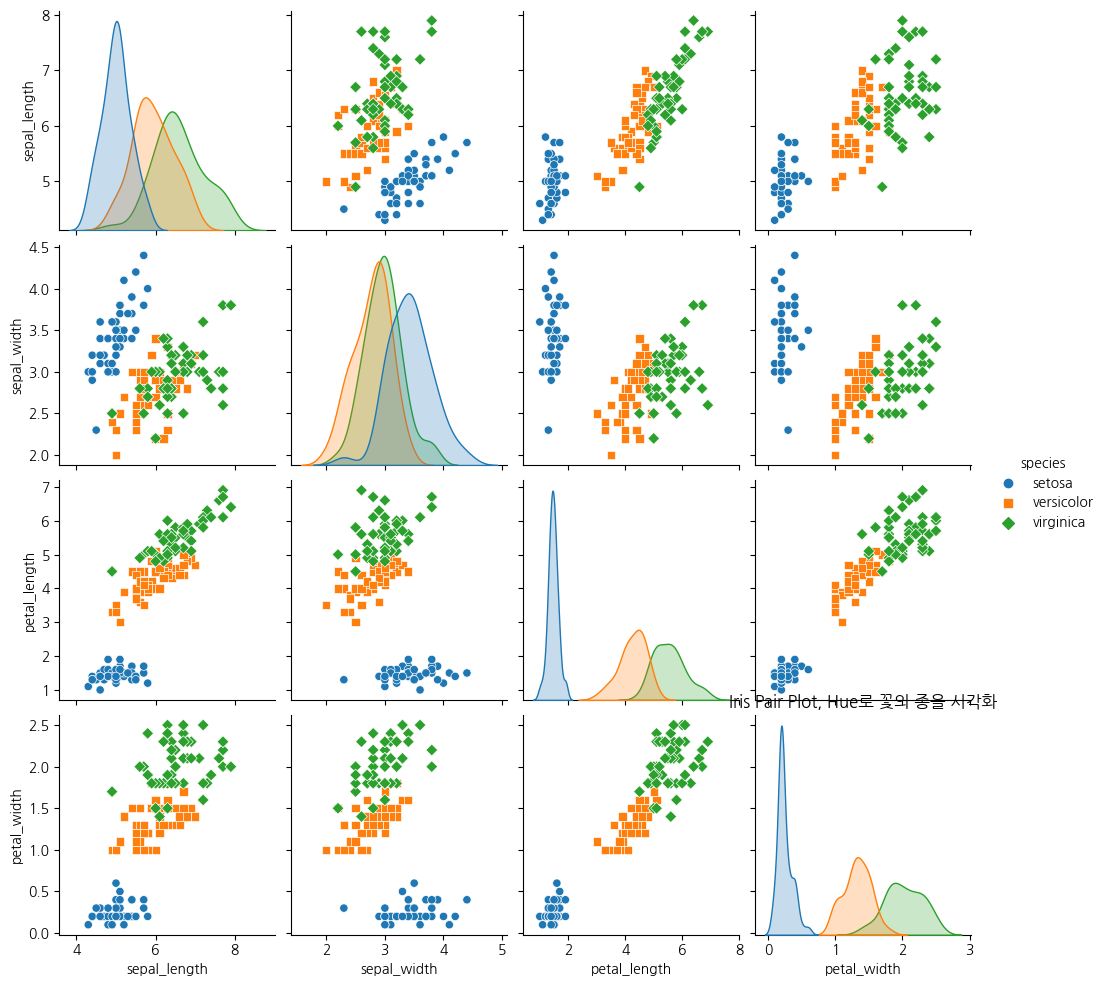

In [40]:
sns.pairplot(iris, hue='species', markers=['o','s','D'])
plt.title('Iris Pair Plot, Hue로 꽃의 종을 시각화')
plt.show()

### 2차원 카테고리 데이터

heatmap : 데이터가 2차원이고 모든 값이 카테고리일 때 사용  
http://seaborn.pydata.org/generated/seaborn.heatmap.html  

In [42]:
titanic_size = titanic.pivot_table(index='class', columns='sex', aggfunc='size')
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


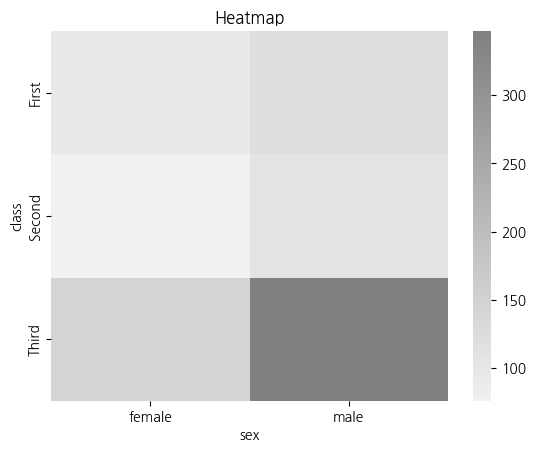

In [44]:
sns.heatmap(titanic_size, cmap = sns.light_palette('gray', as_cmap=True), fmt='d')
plt.title('Heatmap')
plt.show()

### 2차원 복합 데이터

데이터가 2차원이고 실수 값, 카테고리 값이 섞여 있다면 기존의 플롯 이외에 여러 분포 플롯들을 이용할 수 있다.  
- barplot
- boxplot
- pointplot
- violinplot
- stripplot
- swarmplot

barplot : 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트. 평균은 막대 높이, 편차는 에러바(error bar)로 표시  
- barplot :  http://seaborn.pydata.org/generated/seaborn.barplot.html

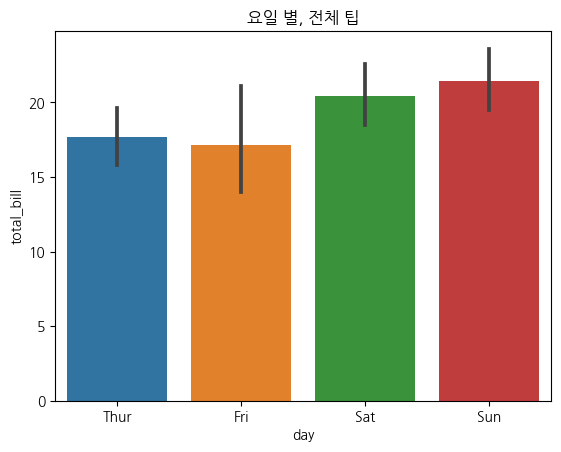

In [45]:
sns.barplot(x='day', y='total_bill', data=tips)
plt.title('요일 별, 전체 팁')
plt.show()

boxplot : 박스-휘스터 플롯(Box-Whisker Plot) 혹은 간단히 박스 플롯이라 부르는 차트 그림. 박스와 박스 바깥의 선(whisker)으로 이루어짐.  
- boxplot :  http://seaborn.pydata.org/generated/seaborn.boxplot.html

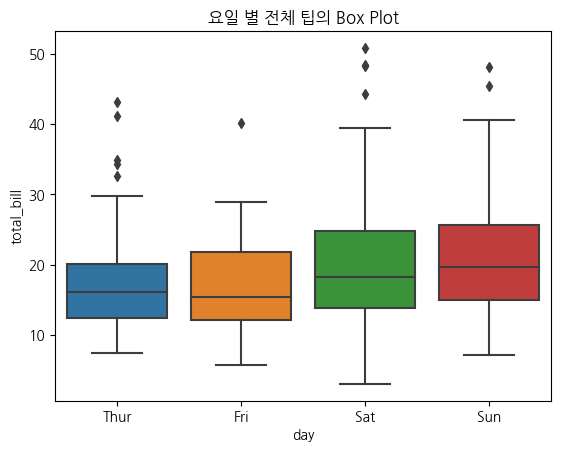

In [46]:
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('요일 별 전체 팁의 Box Plot')
plt.show()

boxplot이 중앙값, 표준 편차 등 분포의 간략한 특성만 보여주는데 반해 violinplot, stripplot, swarmplot 등은 카테고리값에 따른 각 분포의 실제 데이터나 전체 형상을 보여줌.  
  
  
violinplot : 세로 방향으로 커널 밀도 히스토그램을 그려주는데 왼쪽과 오른쪽이 대칭이 되도록 하여 바이올린처럼 보임  
- violinplot : http://seaborn.pydata.org/generated/seaborn.violinplot.html

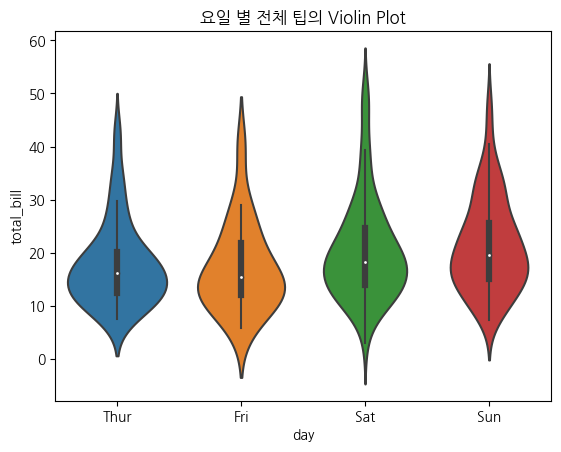

In [48]:
sns.violinplot(x='day', y='total_bill', data=tips)
plt.title('요일 별 전체 팁의 Violin Plot')
plt.show()

stripplot : 스캐터플롯처럼 모든 데이터를 점으로 그림. jitter=True를 설정하면 가로축상의 위치를 무작위로 바꾸어서 데이터 수가 많은 경우 겹치지 않도록 함.  
- stripplot : http://seaborn.pydata.org/generated/seaborn.stripplot.html

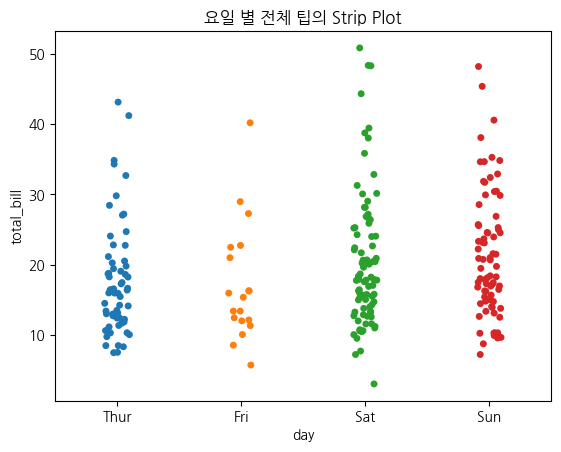

In [51]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)
plt.title('요일 별 전체 팁의 Strip Plot')
plt.show()

swarmplot : stripplot과 비슷하지만 데이터를 나타내는 점이 겹치지 않도록 옆으로 이동  
- swamplot : http://seaborn.pydata.org/generated/seaborn.swarmplot.html

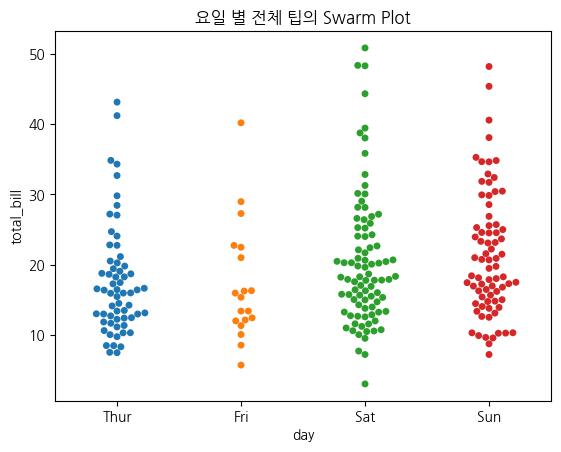

In [52]:
sns.swarmplot(x='day', y='total_bill', data=tips)
plt.title('요일 별 전체 팁의 Swarm Plot')
plt.show()

## 다차원 복합 데이터

barplot, violinplot, boxplot 등에서 두 가지 카테고리 값에 의한 실수 값의 변화를 보기 위한 hue 인수 제공. hue 인수에 카테고리 값을 가지는 변수를 지정하면 카테고리 값에 따라 다르게 시각화. hue 값이 시각화되는 방법은 플롯의 종류에 따라 다름.

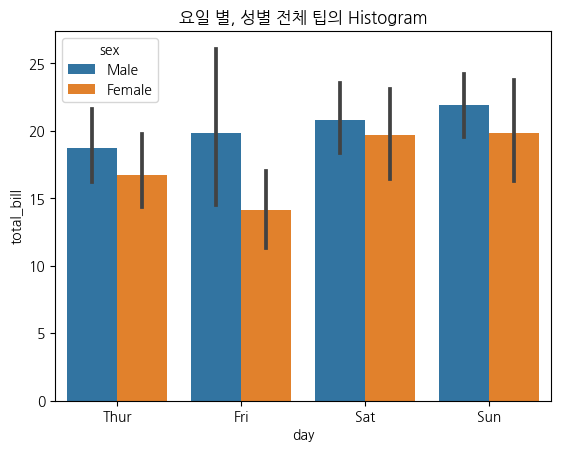

In [53]:
sns.barplot(x='day', y='total_bill', hue='sex', data=tips)
plt.title('요일 별, 성별 전체 팁의 Histogram')
plt.show()

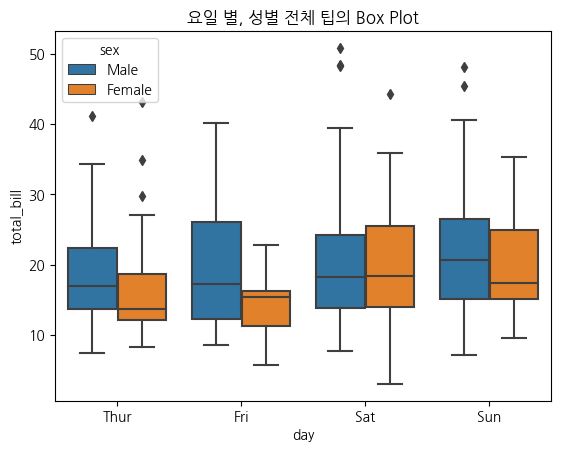

In [54]:
sns.boxplot(x='day', y='total_bill', hue='sex', data=tips)
plt.title('요일 별, 성별 전체 팁의 Box Plot')
plt.show()

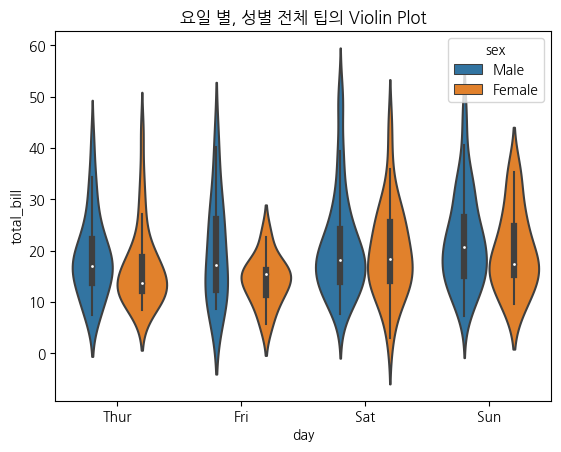

In [55]:
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips)
plt.title('요일 별, 성별 전체 팁의 Violin Plot')
plt.show()

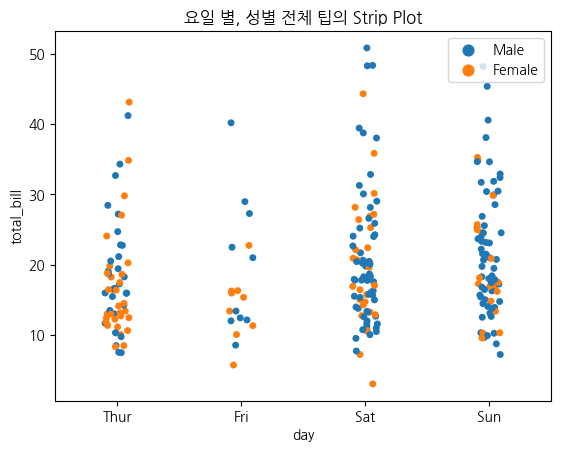

In [57]:
np.random.seed(0)
sns.stripplot(x='day', y='total_bill', hue='sex', data=tips, jitter=True)
plt.title('요일 별, 성별 전체 팁의 Strip Plot')
plt.legend(loc=1)
plt.show()

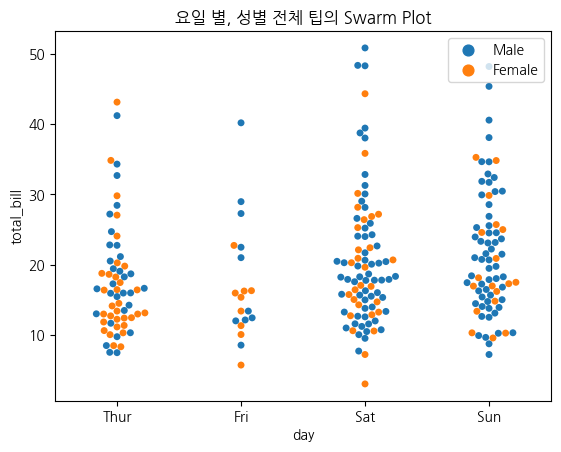

In [58]:
sns.swarmplot(x='day', y='total_bill', hue='sex', data=tips)
plt.title('요일 별, 성별 전체 팁의 Swarm Plot')
plt.legend(loc=1)
plt.show()

stripplot, violinplot, swarmplot 등에서는 split 또는 dodge 옵션으로 시각화 방법을 변경할 수도 있다.

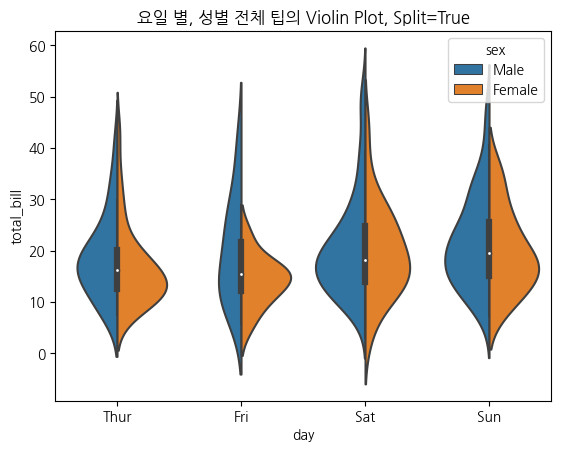

In [60]:
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, split=True)
plt.title('요일 별, 성별 전체 팁의 Violin Plot, Split=True')
plt.show()

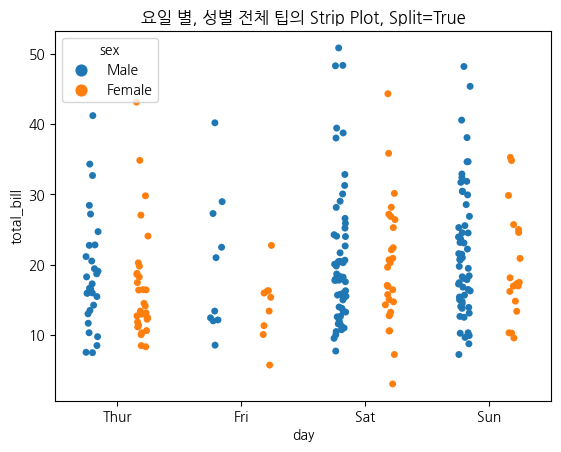

In [63]:
sns.stripplot(x='day', y='total_bill', hue='sex', data=tips, jitter=True, dodge=True) # dodge = split 같은 거임
plt.title('요일 별, 성별 전체 팁의 Strip Plot, Split=True')
plt.show()

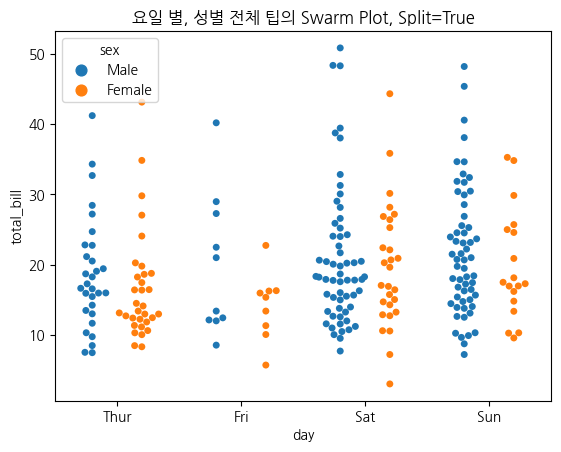

In [64]:
sns.swarmplot(x='day', y='total_bill', hue='sex', data=tips, dodge=True)
plt.title('요일 별, 성별 전체 팁의 Swarm Plot, Split=True')
plt.show()

Heatmap을 이용해도 두 개의 카테고리 값에 의한 실수 값 변화를 볼 수 있다.
- heatmap : http://seaborn.pydata.org/generated/seaborn.heatmap.html

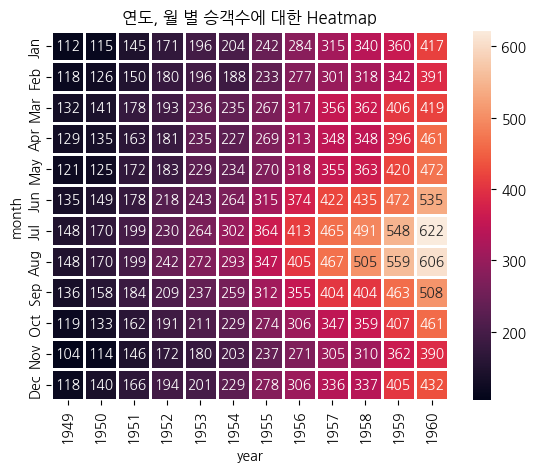

In [65]:
flights_passengers = flights.pivot('month', 'year', 'passengers')
plt.title('연도, 월 별 승객수에 대한 Heatmap')
sns.heatmap(flights_passengers, annot=True, fmt='d', linewidths=1)
plt.show()

### catplot
catplot : 색상(hue)와 행(row) 등을 동시에 사용하여 3개 이상의 카테고리 값에 의한 분포 변화를 보여줌
- catplot : http://seaborn.pydata.org/generated/seaborn.factorplot.html

/Users/heetaecho/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/heetaecho/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/heetaecho/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


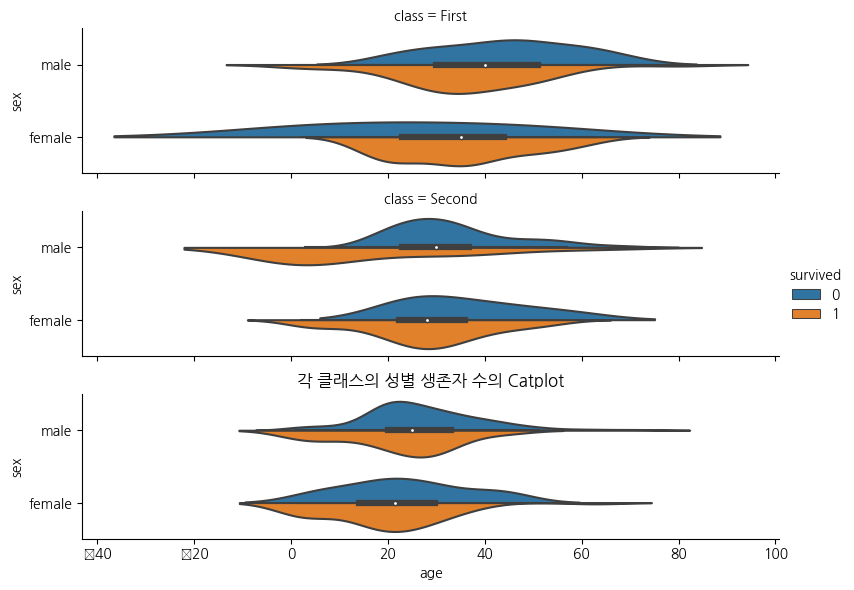

In [67]:
data = titanic[titanic.survived.notnull()]
sns.catplot(x='age', y='sex', hue='survived', row='class', data=data, kind='violin', split=True, height=2, aspect=4)
plt.title('각 클래스의 성별 생존자 수의 Catplot')
plt.show()

## 기타
시각화 효과를 높이기 위해 여러 종류의 차트를 겹쳐서 표시할 수도 있다.

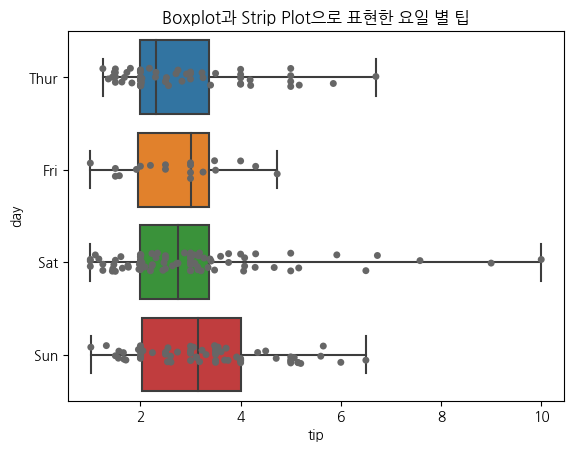

In [68]:
plt.title('Boxplot과 Strip Plot으로 표현한 요일 별 팁')
sns.boxplot(x='tip', y='day', data=tips, whis=np.inf)
sns.stripplot(x='tip', y='day', data=tips, jitter=True, color='0.4')
plt.show()

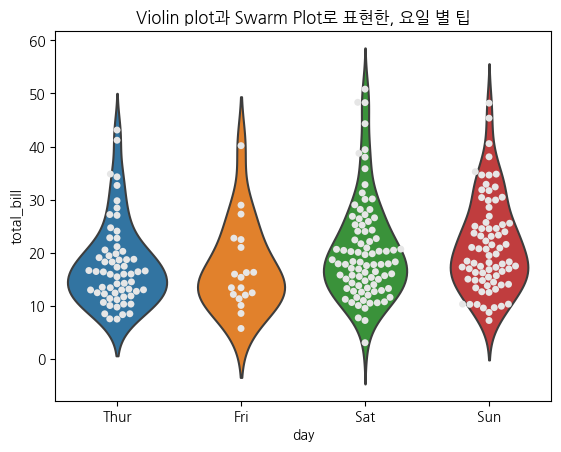

In [69]:
plt.title("Violin plot과 Swarm Plot로 표현한, 요일 별 팁")
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.9")
plt.show()

## 스타일
seaborn을 임포트하면 색상 등을 Matplotlib에서 제공하는 기본 스타일이 아닌 seaborn에서 지정한 기본 스타일로 바꾼다. 따라서 동일한 Matplotlib 명령을 수행해도 seaborn을 임포트 한 것과 하지 않은 플롯을 모양이 다르다.
- http://seaborn.pydata.org/tutorial/aesthetics.html    

set 명령으로 색상, 틱 스타일 등 전반적인 플롯 스타일을 seaborn 기본 스타일로 바꾼다. set_style 명령은 틱 스타일만 바꿀 수 있다. darkgrid, whitegrid, dark, white, ticks 스타일을 제공

In [70]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

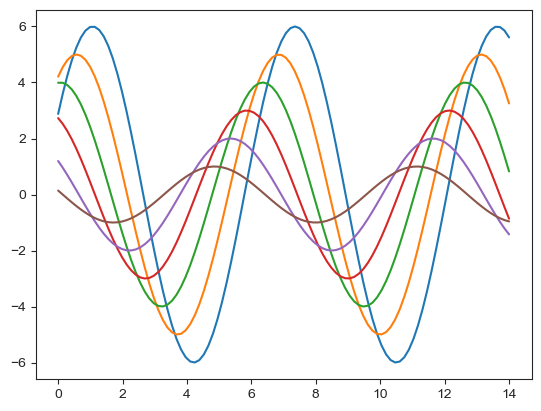

In [71]:
sns.set_style("ticks")
sinplot()

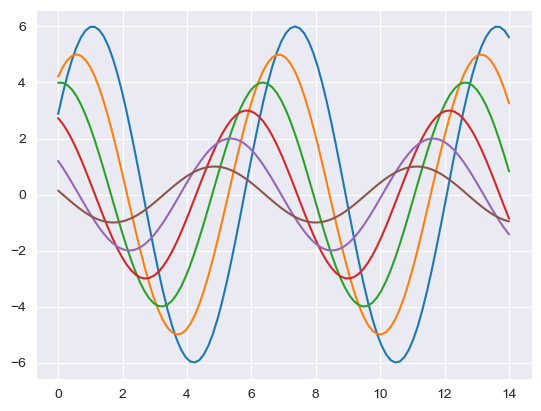

In [72]:
sns.set_style("darkgrid")
sinplot()

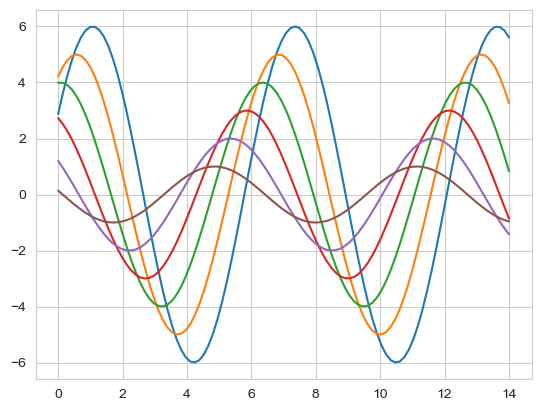

In [73]:
sns.set_style("whitegrid")
sinplot()